In [1]:
import numpy as np 
import pandas as pd
import os
os.environ["KERAS_BACKEND"] = "torch"
import keras
import matplotlib.pyplot as plt
import torch
torch.cuda.empty_cache()

dirList = os.listdir("/kaggle/input/traffic-signs-condensed/archive(1)/Train")
finDirList = [str(x) for x in dirList]
dictMapping = {}
z=0
for y in dirList:
    dictMapping[z] = y
    z+=1
trainData, valData = keras.utils.image_dataset_from_directory("/kaggle/input/traffic-signs-condensed/archive(1)/Train", labels="inferred", label_mode="int", batch_size=64, image_size=(200,200), validation_split=0.3, subset="both", seed=42, shuffle=True, class_names=finDirList)

2025-06-29 04:43:30.139708: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751172210.399462      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751172210.478552      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 8220 files belonging to 10 classes.
Using 5754 files for training.
Using 2466 files for validation.


I0000 00:00:1751172224.753443      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


2
(200, 200, 3)


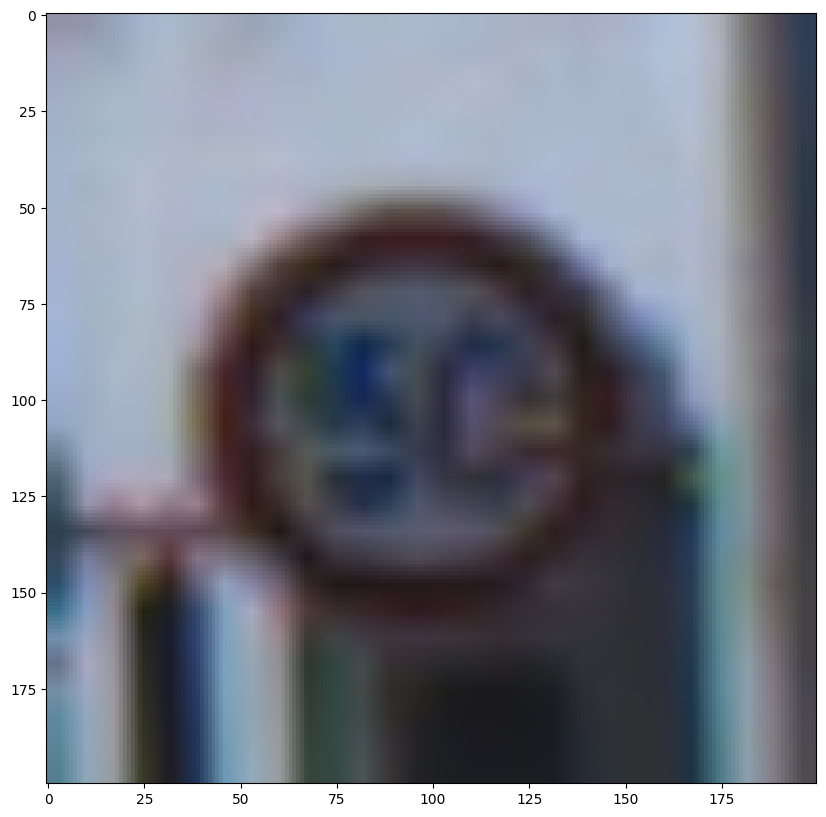

In [2]:
plt.figure(figsize=(10, 10))
for images, labels in trainData.take(1):
    plt.imshow(np.array(images[35]).astype("uint8"))
    value = dictMapping[int(labels[35])]
    print(value)
    print((np.array(images[35]).astype("uint8")).shape)

In [3]:
model = keras.Sequential()
model.add(keras.Input(shape=(200,200,3)))
model.add(keras.layers.Rescaling(scale=1.0/255))
model.add(keras.layers.Conv2D(filters=4, kernel_size=(3,3), strides=(1,1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.ReLU())
model.add(keras.layers.MaxPooling2D(pool_size =(2,2), strides=(2,2)))
model.add(keras.layers.Conv2D(filters=8, kernel_size=(3,3), strides=(1,1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.ReLU())
model.add(keras.layers.MaxPooling2D(pool_size =(2,2), strides=(2,2)))
model.add(keras.layers.Conv2D(filters=16, kernel_size=(3,3), strides=(1,1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.ReLU())
model.add(keras.layers.MaxPooling2D(pool_size =(2,2), strides=(2,2)))
model.add(keras.layers.GlobalAveragePooling2D())
model.add(keras.layers.Dense(64, 'relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(43, 'linear'))
model.add(keras.layers.Softmax())

In [4]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(), optimizer=keras.optimizers.Adam(), metrics=['accuracy'])


In [6]:
model.fit(trainData, epochs=30,  validation_data=valData)

Epoch 1/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - accuracy: 0.1880 - loss: 3.0512 - val_accuracy: 0.2790 - val_loss: 2.8884
Epoch 2/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.3788 - loss: 1.8156 - val_accuracy: 0.3439 - val_loss: 2.1124
Epoch 3/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.4628 - loss: 1.5560 - val_accuracy: 0.3070 - val_loss: 1.9265
Epoch 4/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.5252 - loss: 1.3660 - val_accuracy: 0.4189 - val_loss: 1.6871
Epoch 5/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.5371 - loss: 1.2887 - val_accuracy: 0.5333 - val_loss: 1.4235
Epoch 6/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.5604 - loss: 1.2311 - val_accuracy: 0.5641 - val_loss: 1.3159
Epoch 7/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.5768 - loss: 1.1849 - val_accuracy: 0.5864 - val_loss: 1.1403
Epoch 8/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.5859 - loss: 1.1517 - val_accuracy: 0.6212 - v

In [7]:
model.save("/kaggle/working/finalcnn_model.keras")

In [8]:
finalDir = "/kaggle/input/traffic-signs-condensed/archive(1)/Test"
os.chdir(finalDir)
results = []
for z in os.listdir():
    splitFile = z.split("_")
    concatPath = os.path.join(finalDir, z)
    imageTest = keras.utils.load_img(concatPath, target_size=(200,200))
    img_array = keras.utils.img_to_array(imageTest)
    img_array = keras.ops.expand_dims(img_array, 0)
    predict = model.predict(img_array, verbose=False)
    predict = np.argmax(predict[0])
    predClass = dictMapping[predict]
    if splitFile[0] == predClass:
        results.append(True)
    else:
        results.append(False)

In [9]:
numTrues = 0
for x in results:
    if x == True:
       numTrues+=1
numTrues/len(results)

0.625